In [10]:
import neo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reader = neo.BlackrockIO(filename='/teamspace/studios/this_studio/Olfactory EEG data set induced by different odor types/Sub. 1/A/datafile001.ns2')
blk = reader.read_block()

# blk contains all the data segments and signals


In [5]:
for seg in blk.segments:
    for asig in seg.analogsignals:
        print(asig)  # This will print out the signal object which contains data


[[ -925.25  -781.75  -773.75 ... -1167.75 -8185.   -8192.  ]
 [-1218.75 -1051.75 -1041.25 ... -1480.   -8183.25 -8192.  ]
 [-1488.25 -1307.25 -1298.5  ... -1767.   -8181.75 -8192.  ]
 ...
 [ -980.5   -884.75  -895.75 ... -1130.    8191.75  8191.75]
 [ -668.5   -586.5   -601.75 ...  -779.75  8191.75  8189.75]
 [ -255.5   -244.    -263.   ...  -256.    8191.75  8187.75]] uV


In [6]:
def process_eeg_data(blk):
    electrode_names = [
        'Fp1', 'Fp2', 'F7', 'F8', 'F3', 'F4', 'Fz', 'C3', 'C4', 'Cz', 
        'P3', 'P4', 'Pz', 'O1', 'O2', 'T7', 'T8', 'P7', 'P8', 
        'FC1', 'FC2', 'FC5', 'FC6', 'CP1', 'CP2', 'CP5', 'CP6', 'POz', 'Oz','AFz', 'M1', 'M2'
    ]

    data = []
    for seg in blk.segments:
        for asig in seg.analogsignals:
            # Extract the signal for all 32 channels
            signal_data = asig.magnitude[:, :32]
            data.append(signal_data)

    # Convert list to numpy array
    data_array = np.array(data)

    # Reshape the data to (num_samples, num_channels, num_timepoints)
    num_samples, num_timepoints, num_channels = data_array.shape
    data_reshaped = data_array.reshape(num_samples * num_timepoints, num_channels)

    # Create a DataFrame
    df = pd.DataFrame(data_reshaped, columns=electrode_names)

    # Add sample and time information
    df['Sample'] = np.repeat(np.arange(num_samples), num_timepoints)
    df['Time'] = np.tile(np.arange(num_timepoints) / 1000, num_samples)  # Assuming 1kHz sampling rate

    return df

# Example usage (assuming 'blk' is already defined)
eeg_data = process_eeg_data(blk)


In [7]:
eeg_data

,Fp1,Fp2,F7,F8,F3,F4,Fz,C3,C4,Cz,...,CP2,CP5,CP6,POz,Oz,AFz,M1,M2,Sample,Time
0,-925.25,-781.75,-773.75,-856.25,-801.00,-798.25,-725.50,-704.50,-724.25,-800.75,...,-869.00,-940.50,-932.50,-1110.00,-880.00,-1167.75,-8185.00,-8192.00,0,0.000
1,-1218.75,-1051.75,-1041.25,-1130.50,-1067.50,-1060.25,-956.75,-943.25,-947.25,-1079.75,...,-1124.50,-1234.00,-1229.50,-1427.75,-1133.50,-1480.00,-8183.25,-8192.00,0,0.001
2,-1488.25,-1307.25,-1298.50,-1378.00,-1305.00,-1302.00,-1166.50,-1155.25,-1148.75,-1353.50,...,-1355.25,-1495.50,-1486.75,-1716.00,-1359.75,-1767.00,-8181.75,-8192.00,0,0.002
3,-1578.75,-1407.00,-1395.75,-1464.00,-1387.25,-1385.75,-1236.00,-1231.00,-1232.50,-1425.50,...,-1428.00,-1576.50,-1575.25,-1788.00,-1426.25,-1851.25,-595.25,-8192.00,0,0.003
4,-1379.75,-1250.50,-1238.00,-1280.25,-1204.00,-1206.25,-1081.50,-1080.50,-1071.50,-1235.00,...,-1225.00,-1352.50,-1351.25,-1525.75,-1212.00,-1559.50,8191.75,8184.00,0,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,-1458.50,-1271.25,-1284.50,-1347.75,-1287.50,-1274.25,-1187.25,-1210.50,-1161.75,-1481.25,...,-1349.75,-1451.75,-1456.00,-1652.50,-1333.50,-1774.50,3968.25,-8183.50,0,10.005
10006,-1213.00,-1073.50,-1079.75,-1115.50,-1062.00,-1047.25,-978.00,-1002.25,-955.25,-1236.50,...,-1098.25,-1186.75,-1201.25,-1324.25,-1077.50,-1428.75,8191.75,8191.75,0,10.006
10007,-980.50,-884.75,-895.75,-901.50,-858.25,-844.50,-790.00,-805.00,-777.00,-1018.75,...,-871.75,-947.00,-951.50,-1030.25,-841.75,-1130.00,8191.75,8191.75,0,10.007
10008,-668.50,-586.50,-601.75,-601.50,-562.50,-550.75,-526.25,-558.00,-514.00,-720.75,...,-562.00,-640.00,-648.25,-681.25,-543.50,-779.75,8191.75,8189.75,0,10.008


In [8]:
def plot_eeg_channels(df, num_channels=5):
    plt.figure(figsize=(15, 10))
    for i, electrode in enumerate(df.columns[:-2]):  # Exclude 'Sample' and 'Time' columns
        plt.plot(df['Time'], df[electrode], label=f'Channel {i+1}: {electrode}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('EEG Signals')
    plt.legend()
    plt.show()

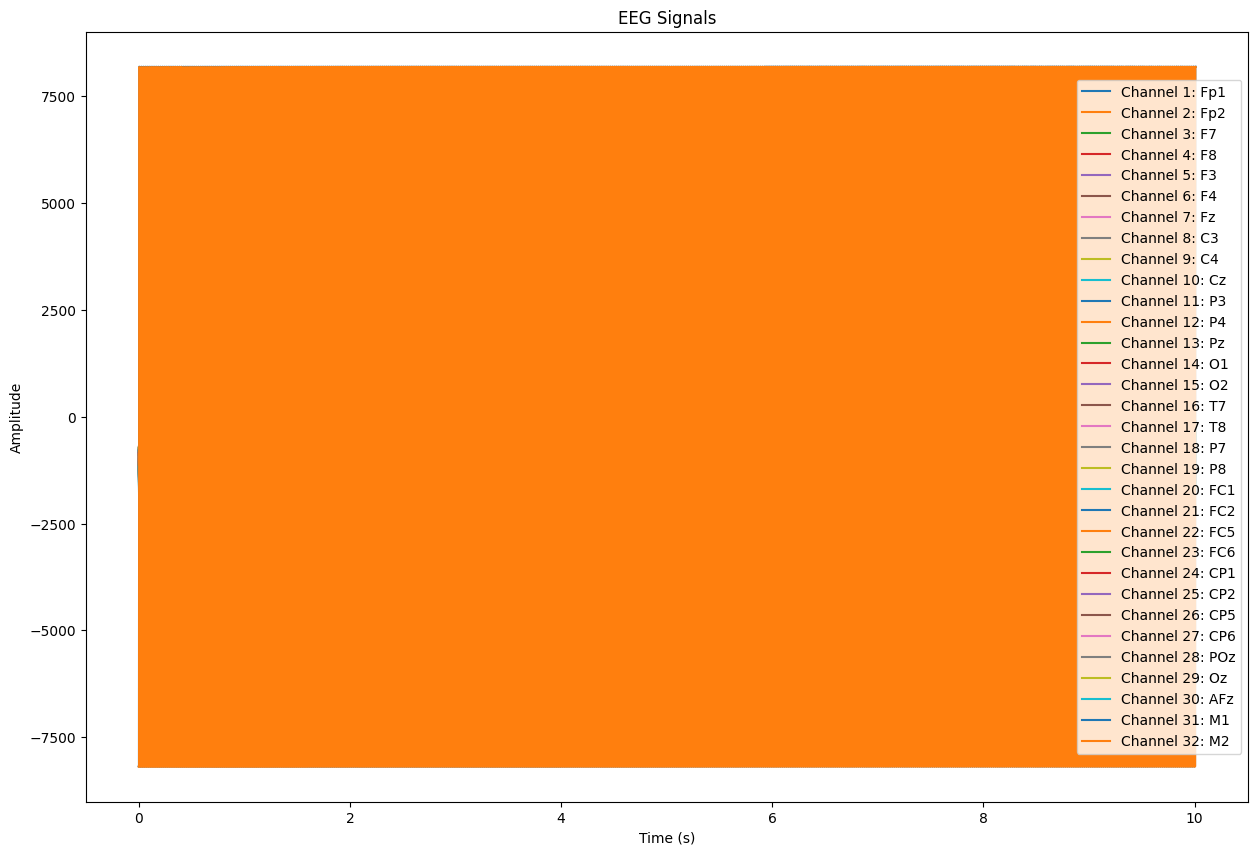

In [11]:
plot_eeg_channels(eeg_data)

In [12]:
eeg_data.to_csv('data-engineering-pipeline/data/data.csv', index=False)

In [13]:
bdata = pd.read_csv('data-engineering-pipeline/data/data.csv')

In [14]:
bdata.head()

,Fp1,Fp2,F7,F8,F3,F4,Fz,C3,C4,Cz,...,CP2,CP5,CP6,POz,Oz,AFz,M1,M2,Sample,Time
0,-925.25,-781.75,-773.75,-856.25,-801.00,-798.25,-725.50,-704.50,-724.25,-800.75,...,-869.00,-940.5,-932.50,-1110.00,-880.00,-1167.75,-8185.00,-8192.0,0,0.000
1,-1218.75,-1051.75,-1041.25,-1130.50,-1067.50,-1060.25,-956.75,-943.25,-947.25,-1079.75,...,-1124.50,-1234.0,-1229.50,-1427.75,-1133.50,-1480.00,-8183.25,-8192.0,0,0.001
2,-1488.25,-1307.25,-1298.50,-1378.00,-1305.00,-1302.00,-1166.50,-1155.25,-1148.75,-1353.50,...,-1355.25,-1495.5,-1486.75,-1716.00,-1359.75,-1767.00,-8181.75,-8192.0,0,0.002
3,-1578.75,-1407.00,-1395.75,-1464.00,-1387.25,-1385.75,-1236.00,-1231.00,-1232.50,-1425.50,...,-1428.00,-1576.5,-1575.25,-1788.00,-1426.25,-1851.25,-595.25,-8192.0,0,0.003
4,-1379.75,-1250.50,-1238.00,-1280.25,-1204.00,-1206.25,-1081.50,-1080.50,-1071.50,-1235.00,...,-1225.00,-1352.5,-1351.25,-1525.75,-1212.00,-1559.50,8191.75,8184.0,0,0.004


In [15]:
# You mentioned you expected a sampling rate of 1000 Hz and 64 channels
num_channels = 32
sampling_rate = 1000  # One second of data if sampling rate is 1000 Hz

# Calculate the total number of complete samples you can get
total_data_points = 320320
possible_samples = total_data_points / (num_channels * sampling_rate)

print("You can fit", possible_samples, "complete samples of 1 second each with your data.")


You can fit 10.01 complete samples of 1 second each with your data.


In [45]:
num_data_points = 320320
common_channel_counts = [32, 64, 128]  # common EEG channel counts

# Check how the data points fit with each channel count
for channels in common_channel_counts:
    samples = num_data_points / channels
    print(f"With {channels} channels, you get {samples} samples.")



With 32 channels, you get 10010.0 samples.
With 64 channels, you get 5005.0 samples.
With 128 channels, you get 2502.5 samples.


In [ ]:
import numpy as np

# Load the data
data = pd.read_csv('/content/datafile-output1.csv').values

# Let's assume the number of channels is 64 and we now know the exact number of samples
num_data_points = 320320
num_channels = 64
num_samples = num_data_points / num_channels  # this should be an integer

# Reshape the data (ensure data is loaded correctly if it's not already a numpy array)
reshaped_data = np.array(data).reshape((int(num_samples), num_channels))

# Assuming the output of possible_samples is not a whole number and you truncate it
# num_complete_samples = int(possible_samples)  # Truncate to get only complete samples

# # Calculate the number of points that fit into complete samples
# points_to_use = num_complete_samples * num_channels * sampling_rate

# # Reshape the data
# reshaped_data = data[:points_to_use].reshape(num_complete_samples, sampling_rate, num_channels)

# # Reshape the data
# num_channels = 64  # example for 64 electrodes
# sampling_rate = 1000  # 1000 Hz sampling rate
# num_samples = data.shape[1] // (num_channels * sampling_rate)  # calculate number of samples

# reshaped_data = data.reshape(num_samples, sampling_rate, num_channels)


In [ ]:
reshaped_data

array([[ -925.25,  -781.75,  -773.75, ..., -1480.  , -8183.25, -8192.  ],
       [-1488.25, -1307.25, -1298.5 , ..., -1851.25,  -595.25, -8192.  ],
       [-1379.75, -1250.5 , -1238.  , ..., -1326.5 ,  8191.75,  8179.25],
       ...,
       [-1323.75, -1140.25, -1147.5 , ..., -1774.5 ,  3968.25, -8183.5 ],
       [-1213.  , -1073.5 , -1079.75, ..., -1130.  ,  8191.75,  8191.75],
       [ -668.5 ,  -586.5 ,  -601.75, ...,  -256.  ,  8191.75,  8187.75]])

In [ ]:
new_data = pd.DataFrame(reshaped_data)

In [ ]:
new_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-925.25,-781.75,-773.75,-856.25,-801.00,-798.25,-725.50,-704.50,-724.25,-800.75,...,-1213.75,-1131.00,-1124.50,-1234.00,-1229.50,-1427.75,-1133.50,-1480.00,-8183.25,-8192.00
1,-1488.25,-1307.25,-1298.50,-1378.00,-1305.00,-1302.00,-1166.50,-1155.25,-1148.75,-1353.50,...,-1550.50,-1437.25,-1428.00,-1576.50,-1575.25,-1788.00,-1426.25,-1851.25,-595.25,-8192.00
2,-1379.75,-1250.50,-1238.00,-1280.25,-1204.00,-1206.25,-1081.50,-1080.50,-1071.50,-1235.00,...,-1151.75,-1060.50,-1049.00,-1169.75,-1167.50,-1288.75,-1035.25,-1326.50,8191.75,8179.25
3,-864.50,-798.25,-788.75,-797.25,-755.00,-758.25,-663.25,-680.00,-655.50,-734.25,...,-487.00,-461.25,-447.00,-521.00,-519.50,-532.00,-432.50,-552.00,8189.00,8173.50
4,-56.25,-59.75,-61.75,-39.25,-25.50,-26.75,-3.50,-24.75,-8.50,32.00,...,526.75,495.25,497.75,486.75,490.50,618.75,500.75,604.00,8185.75,8170.50
5,833.00,756.25,757.75,791.00,770.00,770.75,712.25,682.50,704.50,842.50,...,1180.00,1082.75,1080.50,1133.00,1137.50,1346.75,1084.50,1345.25,8182.75,8167.25
6,1378.00,1284.75,1276.50,1301.75,1259.50,1252.25,1161.00,1113.75,1146.75,1315.50,...,1523.50,1374.00,1365.00,1467.50,1463.00,1701.75,1363.75,1693.50,-378.00,8169.00
7,1270.50,1216.50,1210.00,1192.25,1150.50,1149.75,1058.25,1031.50,1043.25,1214.50,...,1116.25,1009.75,1000.00,1078.00,1075.75,1223.00,993.50,1192.50,-8192.00,-8192.00
8,780.75,780.75,775.75,734.75,704.75,708.25,639.25,634.50,631.25,732.75,...,490.25,413.75,414.25,445.25,451.00,488.00,399.25,441.75,-8189.50,-8192.00
9,-7.75,61.25,60.75,-6.75,10.00,13.25,14.75,22.00,14.00,-10.75,...,-561.75,-524.25,-527.75,-562.75,-559.50,-670.25,-541.25,-734.50,-8186.50,-8192.00


In [ ]:
new_data.shape

(5005, 64)

In [ ]:
5005 * 64

320320

In [ ]:
new_data.to_csv('saved_new_data.csv')